In [404]:
##FK MODEL DIMENSION 4 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from scipy import signal
import seaborn as sns

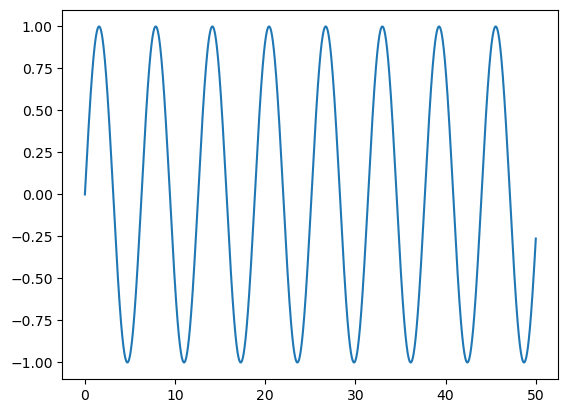

In [2]:
h = 0.01
np.random.seed(10)


time = np.linspace(0,50,5000)
F = 1*np.sin(time)
plt.plot(time,F)

In [3]:
J = np.array([[0,0,1,0],[0,0,0,1],[-1,0,0,0],[0,-1,0,0]])
Q = np.array([[2,-1,0,0],[-1,1,0,0],[0,0,1,0],[0,0,0,1]])
B = np.array([0,0,1,0])
print(Q)

[[ 2 -1  0  0]
 [-1  1  0  0]
 [ 0  0  1  0]
 [ 0  0  0  1]]


In [4]:
det = np.zeros((4,4))
for i in range(4):
    det[i]=np.linalg.matrix_power(J@Q,i)@B
print(det)
print(np.linalg.det(det))

[[ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0. -2.  1.]
 [-2.  1.  0.  0.]]
-1.0


In [5]:
def Integrator(x,i):
  return x+h*(J@Q@x+B*F[i])

In [6]:
trajectory = [np.array([2,1,-3,-3])]
for i in range(999):
  trajectory.append(Integrator(trajectory[-1],i))

Text(0, 0.5, 'position_2')

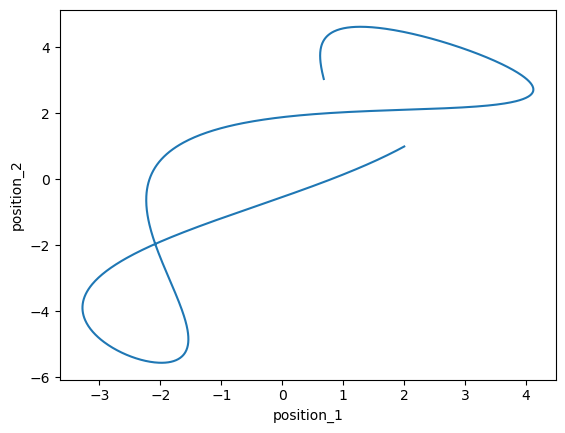

In [7]:
plt.plot([trajectory[i][0] for i in range(1000)], [trajectory[i][1] for i in range(1000)])
plt.xlabel("position_1")
plt.ylabel("position_2")

In [8]:
output = [(B.T)@Q@item for item in trajectory]

torch.Size([1000])

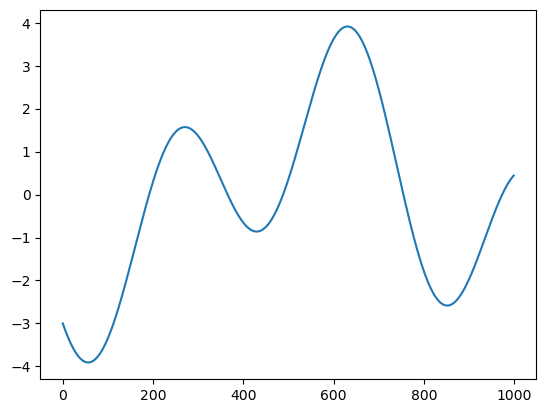

In [9]:
plt.plot(output)
data = torch.FloatTensor(np.array(output))
data.shape

In [10]:
def Integrator2(x,i):
  A=torch.FloatTensor([[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0]])
  A[0][3]=-torch.square(d1*d2)
  A[2][3]=-torch.square(d1)-torch.square(d2)
  B=torch.FloatTensor([0,0,0,0])
  c0 = torch.abs(d1)*(torch.square(v1)+torch.square(v3))+torch.abs(d2)*(torch.square(v2)+torch.square(v4))
  c2 = torch.abs(d1)*torch.square(d2)*(torch.square(v1)+torch.square(v3))+torch.abs(d2)*torch.square(d1)*(torch.square(v2)+torch.square(v4))
  B[1] = c2
  B[3]= c0
  return x+h*(A@x+B*F[i])

In [11]:
x=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,4)]))
d1=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,1)]))
d2=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,1)]))
v1=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,1)]))
v2=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,1)]))
v3=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,1)]))
v4=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,1)]))
num_epochs=1500
optimizer=optim.Adam((x,d1,d2,v1,v2,v3,v4), lr=0.02)
loss_rec = []
x_rec = []
d_rec = []
v_rec = []
test_error_rec = []

/var/folders/mh/ml0ws0cd405fvf5vf8vkrfn80000gn/T/ipykernel_36208/572649746.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/runner/miniforge3/conda-bld/pytorch-recipe_1664817727684/work/torch/csrc/utils/tensor_new.cpp:204.)
  x=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,4)]))


In [12]:
validation_error = []

In [13]:
trajectory = [np.array([2,1,-3,-3])]
for i in range(1999):
  trajectory.append(Integrator(trajectory[-1],i))
output = [(B.T)@Q@item for item in trajectory]

for k in range(num_epochs):
  optimizer.zero_grad()
  fake_data = torch.FloatTensor(1000,4)
  fake_data[0]=x
  for i in range(1,1000):
    temp = fake_data[i-1].clone()
    fake_data[i]=Integrator2(temp,i-1)
    del temp
  loss=torch.sum(torch.square(fake_data[:,3]-data))
  print("Epoch:",k,"Loss",loss)
  loss.backward()
  optimizer.step()
  del loss
  del fake_data

  if k%5==0:
    fake_data = torch.FloatTensor(2000,4)
    fake_data[0]=x
    for i in range(1,2000):
      temp2 = fake_data[i-1].clone()
      fake_data[i]=Integrator2(temp2,i-1)
      del temp2
    result = fake_data[:,3]
    prediction = result.detach().numpy()
    test_error = np.sum(np.square(prediction[1000:]-np.array(output)[1000:]))
    test_error_rec.append(test_error)
    print("Test Error:", test_error)
    validation_error.append(test_error)
    del result
    del prediction
    del fake_data

Epoch: 0 Loss tensor(98139.1562, grad_fn=<SumBackward0>)
Test Error: 501871.8465861272
Epoch: 1 Loss tensor(86911.6250, grad_fn=<SumBackward0>)
Epoch: 2 Loss tensor(75718.1250, grad_fn=<SumBackward0>)
Epoch: 3 Loss tensor(65321.0898, grad_fn=<SumBackward0>)
Epoch: 4 Loss tensor(56360.4727, grad_fn=<SumBackward0>)
Epoch: 5 Loss tensor(49269.2461, grad_fn=<SumBackward0>)
Test Error: 352251.3213951504
Epoch: 6 Loss tensor(44198.3945, grad_fn=<SumBackward0>)
Epoch: 7 Loss tensor(40977.0430, grad_fn=<SumBackward0>)
Epoch: 8 Loss tensor(39157.6484, grad_fn=<SumBackward0>)
Epoch: 9 Loss tensor(38163.3438, grad_fn=<SumBackward0>)
Epoch: 10 Loss tensor(37471.6250, grad_fn=<SumBackward0>)
Test Error: 186611.58877100225
Epoch: 11 Loss tensor(36729.6719, grad_fn=<SumBackward0>)
Epoch: 12 Loss tensor(35762.6328, grad_fn=<SumBackward0>)
Epoch: 13 Loss tensor(34520.5117, grad_fn=<SumBackward0>)
Epoch: 14 Loss tensor(33021.8594, grad_fn=<SumBackward0>)
Epoch: 15 Loss tensor(31315.4043, grad_fn=<SumBac

In [14]:
print(x,d1,d2,v1,v2,v3,v4)

Parameter containing:
tensor([[-0.1090, -0.5571, -0.2590, -2.4775]], requires_grad=True) Parameter containing:
tensor([[0.4539]], requires_grad=True) Parameter containing:
tensor([[-0.6278]], requires_grad=True) Parameter containing:
tensor([[2.0970e-05]], requires_grad=True) Parameter containing:
tensor([[2.6577e-08]], requires_grad=True) Parameter containing:
tensor([[4.4849e-20]], requires_grad=True) Parameter containing:
tensor([[-4.1768e-07]], requires_grad=True)


In [15]:
np.linalg.eig(J@Q)[0]

array([-1.37048816e-20+1.61803399j, -1.37048816e-20-1.61803399j,
        5.95659421e-17+0.61803399j,  5.95659421e-17-0.61803399j])

In [16]:
trajectory = [np.array([2,1,-3,-3])]
for i in range(4999):
  trajectory.append(Integrator(trajectory[-1],i))

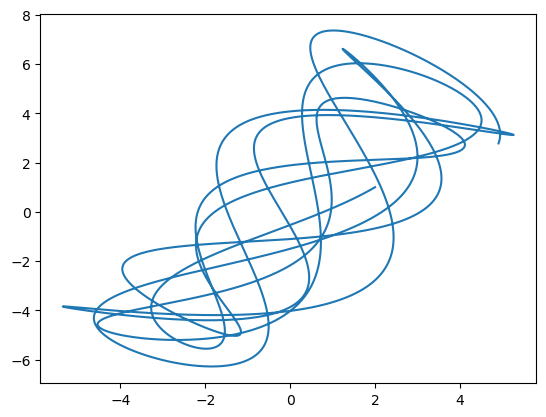

In [17]:
plt.plot([trajectory[i][0] for i in range(5000)], [trajectory[i][1] for i in range(5000)])

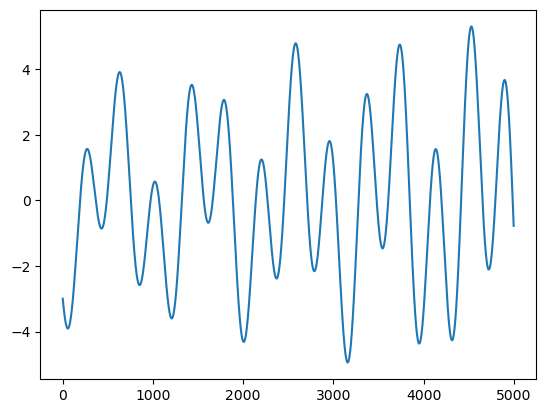

In [18]:
output = [(B.T)@Q@item for item in trajectory]
plt.plot(output)

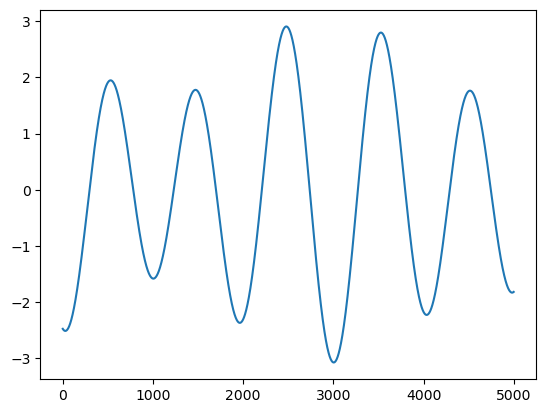

In [19]:
prediction = []
fake_data = torch.FloatTensor(5000,4)
fake_data[0]=x
for i in range(1,5000):
  temp = fake_data[i-1].clone()
  fake_data[i]=Integrator2(temp,i-1)
result = fake_data[:,3]
prediction = result.detach().numpy()
plt.plot(prediction)
train_error = np.sum(np.square(prediction[:500]-np.array(output)[:500]))
test_error = np.sum(np.square(prediction[500:]-np.array(output)[500:]))

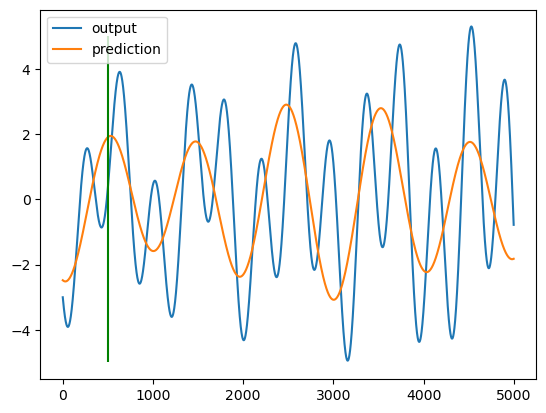

In [20]:
plt.figure()
plt.plot(output, label = 'output')
plt.plot(prediction, label = 'prediction')
plt.vlines(ymin=-5,ymax=5,x=500,color="green")
plt.legend()

In [21]:
train_error, test_error

(1175.9016674297168, 25986.925086860523)

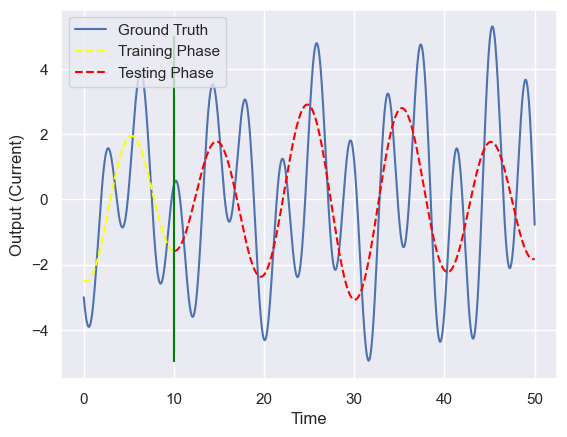

In [34]:
sns.set()
plt.figure()
plt.plot(np.linspace(0,50,5000),output, label = 'Ground Truth')
plt.plot(np.linspace(0,50,5000)[:1000],prediction[:1000], label = 'Training Phase', linestyle="dashed", color = "yellow")
plt.plot(np.linspace(0,50,5000)[1000:5000],prediction[1000:5000], label = 'Testing Phase', linestyle="dashed", color="red")
plt.vlines(color="green",ymin=-5,ymax=5,x=10)
plt.xlabel("Time")
plt.ylabel("Output (Current)")
plt.legend()
plt.savefig("Visualization for paper/FK.pdf", bbox_inches='tight')

In [25]:
print(len(validation_error))

300


In [26]:
quotient_validation_error = [16018.013749360452,
 8409.955300709733,
 4037.5853660834296,
 5274.349709282349,
 4306.232984025723,
 6299.173104697818,
 8460.695440937634,
 7514.504827591318,
 5662.89711962766,
 4663.798333953091,
 4231.283370709312,
 4069.276055047268,
 3673.0225281506614,
 3113.8806208120895,
 2813.9009274625814,
 2852.2887490746016,
 3064.0253585022433,
 3219.455710831711,
 3300.504908146344,
 3417.4793447107386,
 3565.4574742743525,
 3635.3261826566577,
 3598.361898859983,
 3540.1263431571415,
 3507.3017905435295,
 3465.1489874777744,
 3397.320673392933,
 3335.927225874728,
 3289.694414876718,
 3237.946394045647,
 3182.250024188669,
 3135.5027665781877,
 3091.598799647651,
 3045.281892060171,
 3002.219406920188,
 2961.477081453772,
 2919.202226665916,
 2877.476537371149,
 2836.6518670997516,
 2795.116597993865,
 2753.9633348333523,
 2713.60013061197,
 2673.350496584555,
 2633.7061517046563,
 2594.6590876083396,
 2555.8401013814687,
 2517.4002778459576,
 2479.264050202098,
 2441.2970697925593,
 2403.645290836463,
 2366.269294033987,
 2329.165157377177,
 2292.390533632666,
 2255.892664631646,
 2219.6763431655254,
 2183.722334124348,
 2148.012583347455,
 2112.5633567869127,
 2077.3590506385062,
 2042.4156474028007,
 2007.725503013682,
 1973.2880393548708,
 1939.1058491612105,
 1905.1743729484772,
 1871.4974592208277,
 1838.0686669441536,
 1804.913048784545,
 1772.0084453315355,
 1739.3864438281223,
 1707.0321707002608,
 1674.960026284992,
 1643.1723558952447,
 1611.6783528169972,
 1580.4810140863206,
 1549.5893508506517,
 1519.009860410107,
 1488.7503107907141,
 1458.812566048424,
 1429.2131946910517,
 1399.948043724302,
 1371.0429841324856,
 1342.4755537246792,
 1314.2706236379934,
 1286.4309036185737,
 1258.954916311626,
 1231.8579058275889,
 1205.1410311378047,
 1178.800669730026,
 1152.8524900414502,
 1127.29197458659,
 1102.1295050754018,
 1077.3541069607534,
 1052.9899782469706,
 1029.0106981936276,
 1005.4355792055587,
 982.2609804854005,
 959.4990466921531,
 937.1248911028827,
 915.158180088957,
 893.5893878145328,
 872.4274512393906,
 851.6529985560799,
 831.2848263163156,
 811.3037602812408,
 791.7180288163443,
 772.5268931845624,
 753.704134646866,
 735.2764279719129,
 717.2313183367512,
 699.5568065260981,
 682.2610329872324,
 665.3266976875428,
 648.7544267004657,
 632.5411345621164,
 616.6929039611199,
 601.1840009721158,
 586.024966464863,
 571.2016471839611,
 556.7157867950843,
 542.5724682849975,
 528.7373132200742,
 515.2320020286849,
 502.03749004816365,
 489.1537293694599,
 476.5758150677436,
 464.2923558243409,
 452.3063050846798,
 440.6075021267143,
 429.193313721346,
 418.0482822537785,
 407.17699295707484,
 396.58082135855835,
 386.2411796948533,
 376.1529956934321,
 366.32549623410665,
 356.7307275290823,
 347.3838672001916,
 338.2713018353083,
 329.3910398423034,
 320.73100994806396,
 312.28877688397677,
 304.0739211703771,
 296.0572556014478,
 288.24642338428293,
 280.6399708859041,
 273.23137301957206,
 266.0166232745534,
 258.98058227377095,
 252.1306398792374,
 245.4561151366218,
 238.96220604847335,
 232.6356645324485,
 226.46797182124328,
 220.47314019010508,
 214.62466351758695,
 208.93488799364388,
 203.395767939993,
 198.00182065621462,
 192.75094355552284,
 187.63395900717433,
 182.65835791870103,
 177.81425702732128,
 173.09252265544592,
 168.49710821468395,
 164.02927988528694,
 159.677067077866,
 155.43788811507812,
 151.31336227031667,
 147.29792775819337,
 143.38813980875074,
 139.58051784227658,
 135.87930675798077,
 132.27428249955707,
 128.7636087919,
 125.34737450340079,
 122.0228813650921,
 118.78281715563426,
 115.63402616134549,
 112.56614601124008,
 109.58085682072314,
 106.67347892976134,
 103.84310935913373,
 101.09206488307859,
 98.40627382713687,
 95.79557460671029,
 93.25415227329934,
 90.78361747990796,
 88.37351805997037,
 86.0271081000866,
 83.74504187018358,
 81.524497288075,
 79.36327528118346,
 77.25389871951846,
 75.20495167227318,
 73.20768602685897,
 71.26066764946894,
 69.37088961939091,
 67.53099974861766,
 65.7348994959782,
 63.985121966638886,
 62.28758410139973,
 60.63146797839636,
 59.01745978573935,
 57.446270680898806,
 55.916935906978864,
 54.43123725471865,
 52.98285137526232,
 51.56562250132074,
 50.19272301127921,
 48.85569773531172,
 47.554133068380054,
 46.28253633423045,
 45.04608662800586,
 43.84384223976825,
 42.6711892320468,
 41.53014248819617,
 40.41753887421195,
 39.334560438680874,
 38.28181139502465,
 37.25402004289634,
 36.25556278205869,
 35.28363742629567,
 34.33408375755754,
 33.412673847362406,
 32.512138547349736,
 31.636314626071545,
 30.785202070784678,
 29.954726496861905,
 29.147089528127715,
 28.358875153277076,
 27.59280561414946,
 26.846397514232123,
 26.11926883545461,
 25.410935499446367,
 24.72286056875434,
 24.052268096617524,
 23.398328521367365,
 22.761731063727993,
 22.143462541066263,
 21.539866602972005,
 20.951980850476378,
 20.380122644247017,
 19.82505047571262,
 19.283009769837363,
 18.754688716680203,
 18.242402282697217,
 17.741552502776674,
 17.254274722567065,
 16.78103449601619,
 16.320012662012164,
 15.870999492750371,
 15.434769432710297,
 15.009385142502431,
 14.594129383583804,
 14.19254887990294,
 13.800025971442524,
 13.41918693600784,
 13.0477688836779,
 12.685596088266712,
 12.334190180111246,
 11.992331121927482,
 11.660259015086275,
 11.3356930641136,
 11.021081397554921,
 10.713638730630977,
 10.414595154937402,
 10.124516076651426,
 9.843819132216694,
 9.569170237227095,
 9.30202876409197,
 9.042186288791651,
 8.789280853408126,
 8.544427457670489,
 8.305856864191206,
 8.072609627880414,
 7.846976166538884,
 7.627638607482099,
 7.413503988378846,
 7.206816350820334,
 7.00487267786274,
 6.80884701572719,
 6.6178066511613665,
 6.433321012634813,
 6.252914126686661,
 6.078018675082528,
 5.907793716685566,
 5.742671230278087,
 5.5813376889798985,
 5.426535343917967,
 5.274848264144024,
 5.127248913481686,
 4.98457518309713,
 4.845978579989757,
 4.710114515390983,
 4.580135164898553,
 4.452756965936519,
 4.328477863987645,
 4.209180674498002,
 4.0925576089236975,
 3.979529138003077]

In [27]:
print(len(quotient_validation_error))

300


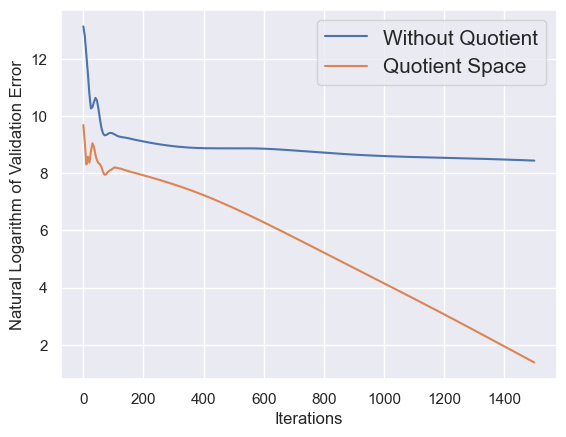

In [33]:
sns.set()
plt.plot(np.linspace(0,1500,300), np.log(np.array(validation_error)), label = "Without Quotient")
plt.plot(np.linspace(0,1500,300), np.log(np.array(quotient_validation_error)), label = "Quotient Space")
plt.xlabel("Iterations")
plt.ylabel("Natural Logarithm of Validation Error")
plt.legend(prop={'size': 15})
plt.savefig("Visualization for paper/Validation_Error.pdf", bbox_inches='tight')